In [17]:
import pandas as pd
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

import seaborn as sns
from matplotlib import pyplot as plt

import random

In [8]:
Cell_data = pd.read_parquet('data/CycleMeetsExpressions/cell_data_full.parquet')

In [9]:
Cell_data = Cell_data.dropna(subset=['Phase'])

In [12]:
genes = list(Cell_data.columns[4:-1])
phases = set(Cell_data['Phase'].unique())
pseudotime = set(Cell_data['pseudotime_proxy'])

In [46]:
# seperate input and output variables 
X = Cell_data[genes]

In [47]:
y = Cell_data['Phase'].replace({'G1':1, 'S': 2, 'G2M':3})

C:\Users\ngl\AppData\Local\Temp\ipykernel_12080\80718701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = Cell_data['Phase'].replace({'G1':1, 'S': 2, 'G2M':3})


In [7]:
# y1 = Cell_data['pseudotime_proxy']

In [49]:
# initialize a RF model 
model = RandomForestRegressor(n_estimators=30, max_depth=3, random_state=42)

In [50]:
feat_selector = BorutaPy(
	verbose=2,
	estimator=model,
	n_estimators=10,
	max_iter=25  # number of iterations to perform
)

In [51]:
# Train Boruta
feat_selector.fit(X, y)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	20773
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	0
Tentative: 	35
Rejected: 	20738
Iteration: 	9 / 25
Confirmed: 	3
Tentative: 	32
Rejected: 	20738
Iteration: 	10 / 25
Confirmed: 	3
Tentative: 	32
Rejected: 	20738
Iteration: 	11 / 25
Confirmed: 	3
Tentative: 	32
Rejected: 	20738
Iteration: 	12 / 25
Confirmed: 	5
Tentative: 	22
Rejected: 	20746
Iteration: 	13 / 25
Confirmed: 	5
Tentative: 	22
Rejected: 	20746
Iteration: 	14 / 25
Confirmed: 	5
Tentative: 	22
Rejected: 	20746
Iteration: 	15 / 25
Confirmed: 	5
Tentative: 	22
Rejected: 	20746
Iteration: 	16 / 25
Confir

BorutaPy(estimator=RandomForestRegressor(max_depth=3, n_estimators=10,
                                         random_state=RandomState(MT19937) at 0x2237EBA7540),
         max_iter=25, n_estimators=10,
         random_state=RandomState(MT19937) at 0x2237EBA7540, verbose=2)

In [52]:
# Print support and ranking for each feature
print('\n------Support and Ranking for each feature------')
# indexes of selected features
feat_indexes = set()
for i in range(len(feat_selector.support_)):
	if feat_selector.support_[i]:
		print('Passes the test: ', X.columns[i],
			  ' - Ranking: ', feat_selector.ranking_[i])
		feat_indexes.add(i)
	else:
		pass
# print('Doesn\'t pass the test: ',
# 	  X.columns[i], ' - Ranking: ', feat_selector.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  ENSMUSG00000002055  - Ranking:  1
Passes the test:  ENSMUSG00000020914  - Ranking:  1
Passes the test:  ENSMUSG00000022037  - Ranking:  1
Passes the test:  ENSMUSG00000026605  - Ranking:  1
Passes the test:  ENSMUSG00000027715  - Ranking:  1
Passes the test:  ENSMUSG00000031004  - Ranking:  1
Passes the test:  ENSMUSG00000045328  - Ranking:  1


In [53]:
selected_features = [X.columns[i] for i in feat_indexes]
selected_cols = list(Cell_data.columns[:4]) + selected_features
selected_genes = Cell_data[selected_cols]

['ENSMUSG00000027715',
 'ENSMUSG00000002055',
 'ENSMUSG00000020914',
 'ENSMUSG00000031004',
 'ENSMUSG00000026605',
 'ENSMUSG00000022037',
 'ENSMUSG00000045328']

In [57]:
# Convert the dataframe from white to long
selected_genes = selected_genes.melt(id_vars=list(Cell_data.columns[:4]),
									 value_vars=selected_features,
                                     var_name='gene',
                                     value_name='expression [RNAseq]',
									 ignore_index=True)

In [58]:
selected_genes

,cellid,Phase,pseudotime,pseudotime_proxy,gene,expression [RNAseq]
0,SCG0088_AAACAGCCACCAACCG-1,G1,G1_1,1.0,ENSMUSG00000027715,0.0
1,SCG0088_AAACAGCCATGATTGT-1,G1,G1_13,13.0,ENSMUSG00000027715,0.0
2,SCG0088_AAACATGCACAACCTA-1,G1,G1_12,12.0,ENSMUSG00000027715,0.0
3,SCG0088_AAACATGCAGTCTAGC-1,G1,G1_3,3.0,ENSMUSG00000027715,0.0
4,SCG0088_AAACATGCATGGCCCA-1,G2M,G2M_9,41.0,ENSMUSG00000027715,0.0
...,...,...,...,...,...,...
112275,SCG0091_TTTGTGGCAGTTGCGT-1,S,S_6,27.0,ENSMUSG00000045328,0.0
112276,SCG0091_TTTGTGTTCCTCCTAA-1,G1,G1_1,1.0,ENSMUSG00000045328,0.0
112277,SCG0091_TTTGTGTTCGTTACAA-1,G1,G1_4,4.0,ENSMUSG00000045328,0.0
112278,SCG0091_TTTGTTGGTACCAGGT-1,S,S_7,28.0,ENSMUSG00000045328,0.0


In [59]:
# Save to pickle
# with open ('data/CycleMeetsExpressions/second_results_selected_genes.pickle', 'wb') as f:
# 	pickle.dump(selected_genes, f)

In [2]:
# Read from pickle
# with open('data/CycleMeetsExpressions/second_results_selected_genes.pickle', 'rb') as f:
# 	selected_genes = pickle.load(f)

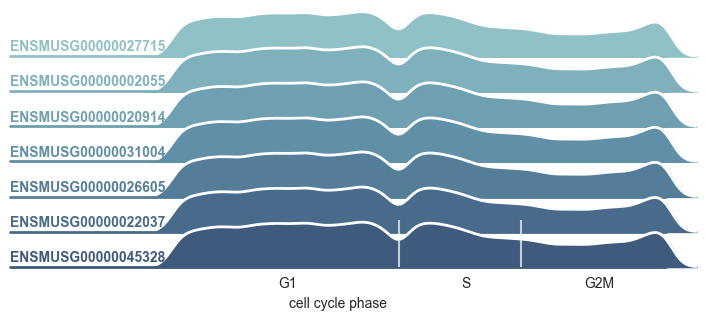

In [3]:
sns.set_style(style='white', rc={'axes.facecolor': (0,0,0,0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
	selected_genes,
	row='gene',
	hue='gene',
	aspect=15,
	height=.5,
	palette=pal
)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'pseudotime_proxy',
	  bw_adjust=.5, clip_on=False,
	  fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'pseudotime_proxy', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
	ax = plt.gca()
	ax.text(0, .2, label, fontweight='bold', color=color,
			ha='left', va='center', transform=ax.transAxes)


g.map(label, 'pseudotime_proxy')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(xlim=(-15,44))
g.set(yticks=[], ylabel='')
g.set(xticks=[10,26,38], xlabel='cell cycle phase')
g.set(xticklabels=['G1', 'S', 'G2M'])

plt.axvline(x=20, c='white',lw=1.5, alpha=.7)
plt.axvline(x=31, c='white',lw=1.5, alpha=.7)

g.despine(bottom=True, left=True)

# plt.savefig('Figs/Example_genes_2.png',
# 			bbox_inches='tight')